# Linear regression
The goal of this exercise is to implement the least mean squares algorithm (LMS) for linear regression.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [137]:
#The following code generates the data using the method sklearn.datasets.make_regression:
N = 100
X, t = make_regression(n_samples=N, n_features=1, noise=15)

(100, 1)
(100,)


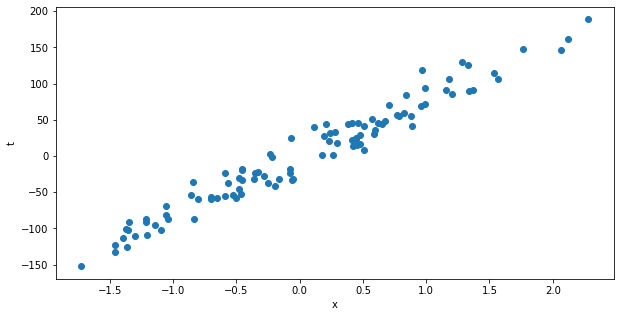

In [106]:
#Print the shape of the arrays X and t to better understand what is generated.
print(X.shape)
print(t.shape)

plt.figure(figsize=(10, 5))
plt.scatter(X, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

w = [94.25611315] , b = [-0.10081164]
mse: [235.2172786]


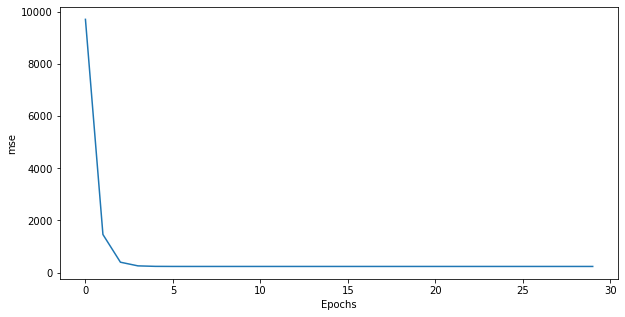

In [138]:
#Implement the LMS algorithm and apply it to the generated data.
w = 0
b = 0

eta = 0.6

losses = []
for epoch in range(30):
    dw = 0
    db = 0.0
    mse = 0.0
    
    for i in range(N):
        # Prediction
        y = w * X[i] + b
        
        # LMS
        dw += (t[i] - y) * X[i]
        db += (t[i] - y)
        
        # mse
        mse += (t[i] - y)**2
        
    # Parameter updates
    w += eta * dw / N
    b += eta * db / N
    losses.append(mse/N)
       
print("w =",w,",","b =", b)

print('mse:', mse/N)
    
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

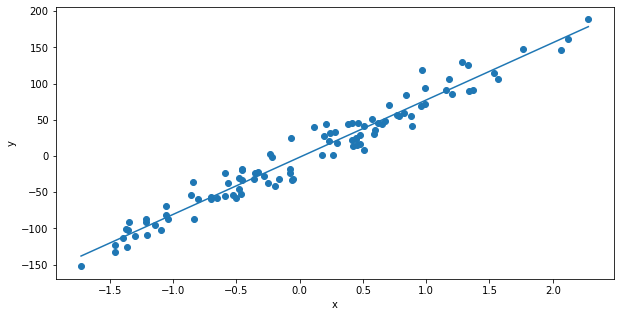

In [108]:
#Visualize the quality of the fit by superposing the learned model to the data with matplotlib.
plt.figure(figsize=(10, 5))

plt.scatter(X, t)

x_axis = [X.min(), X.max()]
plt.plot(x_axis, w*x_axis + b)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

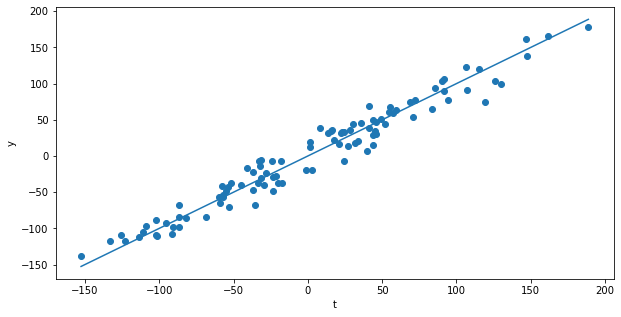

In [109]:
y = w * X + b

plt.figure(figsize=(10, 5))

plt.scatter(t, y)

x_axis = [t.min(), t.max()]
plt.plot(x_axis, x_axis)

plt.xlabel("t")
plt.ylabel("y")
plt.show()

mse: [188.12795021]


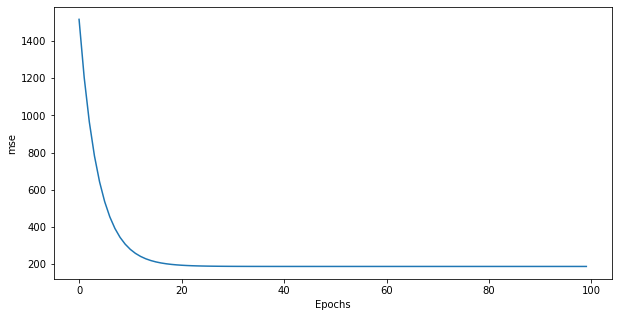

In [131]:
#Modify your LMS algorithm (either directly or copy it in the next cell) 
#to track the mse after each epoch.
w = 0
b = 0

eta = 0.1

losses = []
for epoch in range(100):
    dw = 0
    db = 0.0
    mse = 0.0
    
    for i in range(N):
        # Prediction
        y = w * X[i] + b
        
        # LMS
        dw += (t[i] - y) * X[i]
        db += (t[i] - y)
        
        # mse
        mse += (t[i] - y)**2
    
    # Parameter updates
    w += eta*dw/N
    b += eta*db/N
    losses.append(mse/N)
    
print('mse:', mse/N)
    
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

[array([5271.12364278]), array([5262.55073599]), array([5177.63205821]), array([4404.44536483]), array([1006.92450606]), array([209.64900738]), array([209.64886192])]


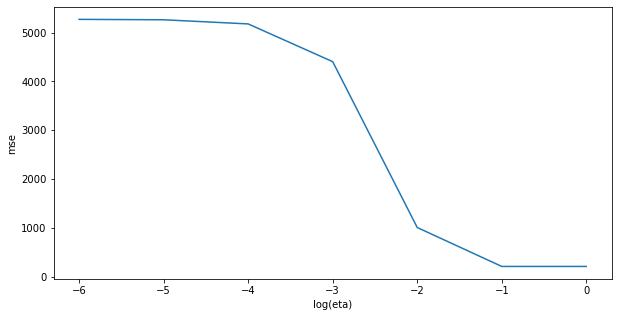

In [121]:
#Iterate over multiple values of eta using a logarithmic scale 
#and plot the final mse after 100 epochs as a function of the learning rate.
losses = []

etas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]

for eta in etas:
    w = 0
    b = 0
    
    for epoch in range(100):
        dw = 0
        db = 0.0
        mse = 0.0

        for i in range(N):
            # Prediction
            y = w*X[i] + b
            
            # LMS
            dw += (t[i] - y)*X[i]
            db += (t[i] - y)
            
            # mse
            mse += (t[i] - y)**2

        # Parameter updates
        w += eta*dw/N
        b += eta*db/N
    
    losses.append(mse/N)
    
print(losses)

plt.figure(figsize=(10, 5))
plt.plot(np.log10(etas), losses)
plt.xlabel("log(eta)")
plt.ylabel("mse")
plt.show()

 # LMS algorithm provided by scikit-learn

In [133]:
#Using the LMS algorithm provided by scikit-learn
#scikit-learn provides a LinearRegression object that implements LMS
from sklearn.linear_model import LinearRegression

#You create the object with:
reg_model = LinearRegression()

reg_model is now an object with different methods (fit(), predict()) that accept any kind of data and performs linear regression.

#To train the model on the data(X,t) , simply use:
reg_model.fit(X, t)

The parameters of the model are obtained with reg_model.coef_ for w  and reg_model.intercept_ for b.

#You can predict outputs for new inputs using:
y = reg_model.predict(X)

[94.25611315] -0.10081163640281599
mse: 235.2172786010611


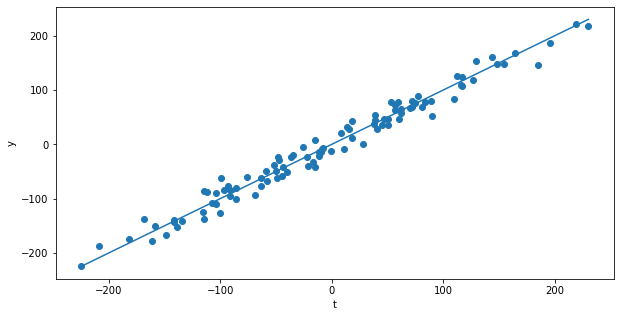

In [143]:
from sklearn.linear_model import LinearRegression

# Linear regression
reg = LinearRegression()
reg.fit(X, t)

print(reg.coef_, reg.intercept_)

# Prediction
y = reg.predict(X)

# mse
mse = np.mean((t - y)**2)
print('mse:', mse)

plt.figure(figsize=(10, 5))
plt.scatter(t, y)
x_axis = [t.min(), t.max()]
plt.plot(x_axis, x_axis)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Delta learning rule

mse: [260.96881796]


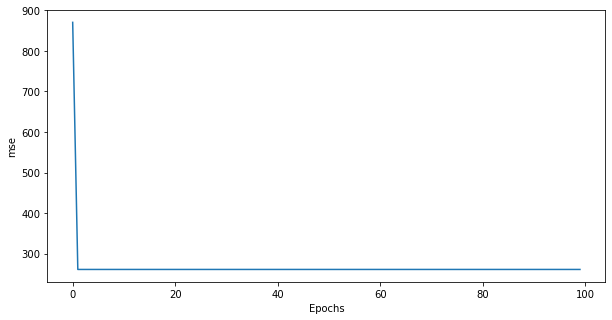

In [144]:
w = 0
b = 0

eta = 0.1

losses = []
for epoch in range(100):
    
    mse = 0.0
    
    for i in range(N):
        # Prediction
        y = w * X[i] + b
        
        # Delta learning rule
        w += eta * (t[i] - y) * X[i]
        b += eta * (t[i] - y)
        
        # mse
        mse += (t[i] - y)**2

    losses.append(mse/N)
    
print('mse:', mse/N)
    
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show() 

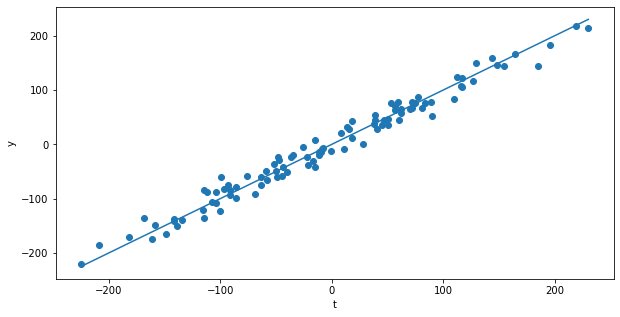

In [146]:
y = w * X + b

plt.figure(figsize=(10, 5))

plt.scatter(t, y)

x_axis = [t.min(), t.max()]
plt.plot(x_axis, x_axis)

plt.xlabel("t")
plt.ylabel("y")
plt.show()

[array([9516.35629002]), array([7899.23261621]), array([1369.64640955]), array([235.68705796]), array([239.41764124]), array([260.96881796])]


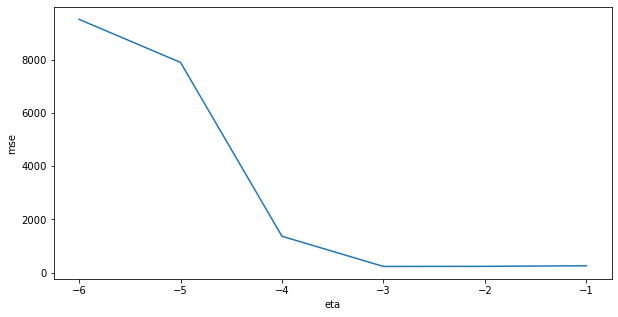

In [147]:
#Vary the learning rate logarithmically as for LMS and conclude.
losses = []

etas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

for eta in etas:
    
    w = 0
    b = 0

    for epoch in range(100):
    
        mse = 0.0
    
        for i in range(N):
            # Prediction
            y = w * X[i] + b
        
            # Delta learning rule
            w += eta * (t[i] - y) * X[i]
            b += eta * (t[i] - y)
        
            # mse
            mse += (t[i] - y)**2

    losses.append(mse/N)
    
print(losses)

plt.figure(figsize=(10, 5))
plt.plot(np.log10(etas), losses)
plt.xlabel("eta")
plt.ylabel("mse")
plt.show()

The optimal value of eta is now 0.001, higher learning rates lead to worse mse. One explanation is that the true learning rate of LMS is eta/N = 0.001, not eta=0.1. When using 0.001 for the learning, the delta learning rule behaves exactly like LMS:

mse: [235.68705796]


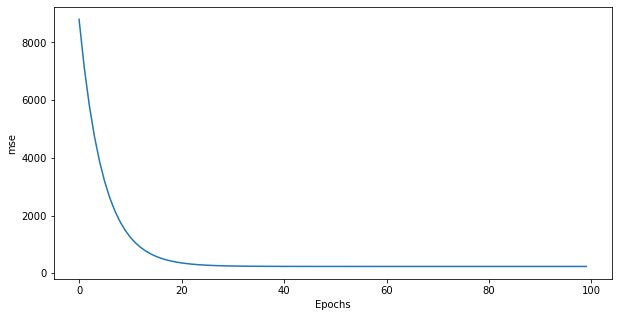

In [148]:
w = 0
b = 0

eta = 0.001

losses = []
for epoch in range(100):
    
    mse = 0.0
    
    for i in range(N):
        # Prediction
        y = w * X[i] + b
        
        # Delta learning rule
        w += eta * (t[i] - y) * X[i]
        b += eta * (t[i] - y)
        
        # mse
        mse += (t[i] - y)**2

    losses.append(mse/N)
    
print('mse:', mse/N)
    
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show() 